# MNIST Principle Component Analysis

The curse of dimmensionality is a problem that arises when the number of features in a dataset is too large. This can cause problems for machine learning algorithms, as the number of features increases, the number of training examples required to learn the relationship between features and labels increases exponentially. This is because the volume of the space increases so rapidly with the number of dimensions that the available data become sparse. Sparse means that the data is thinly distributed in the space. This makes it difficult for algorithms to find enough useful info in the data to make decisions.

Therefore finding ways to reduce dimmensionality when neccesary is important. One way to do this is to use PCA (principle component analysis) to reduce the number of features in the dataset. PCA is a method that uses linear algebra to find the directions/axes of maximum data variance in high-dimensional data. The data is then projected onto these axes to create a new subspace with fewer dimensions than the original one while still preserving predictive information. 

In this project we will perform PCA on mnist and then apply a model to the reduced dataset. The mnist consists of 28x28 pixel images, meaning that a single mnist digit is a 784 dimensional vector. 

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784', version=1)

#seperate data from labels 
X = mnist.data 
y = mnist.target 

print(f'shape of X: {X.shape}')
print(f'shape of y: {y.shape}')

C:\Users\hunte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


shape of X: (70000, 784)
shape of y: (70000,)


PCA identifies a set of orthogonal axes (directions in the dataspace), called principal components, onto which the dataset is projected to preserve maximum variance. The first principal component captures the largest possible variance, and each succeeding component captures the highest variance possible under the constraint that it is orthogonal to the preceding components.

The method for finding principal components is called Singular Value Decomposition (SVD). It decomposes the dataset, X, into three matrices: U, Sigma, and V.T. The product of U, Sigma, and V.T will reconstruct the original matrix X before decomposition.

The matrix U contains the eigenvectors, which define the directions (principal components) of maximum variance in the data.   
The matrix Sigma is a diagonal matrix whose entries are the singular values, which are related to the amount of variance each principal component explains.   
.  
The matrix V.T contains contains the right singular vectors. These vectors represent how each original data point is a combination of the new principal components. 

Before applying SVD, it's common to center the data by subtracting the mean of each feature. This ensures that the first principal component describes the direction of maximum variance. If the data is not centered, the first principal component might instead correspond more closely to the mean of the data.

In the code below, we center the data this way and then use the svd function from the numpy library to perform SVD and find the principal components. The svd function automatically sorts the singular values in Sigma and the corresponding columns in U and V.T. We run W2 = Vt.T[:, :2], which selects the first two right singular vectors, which correspond to the two principal components that explain the most variance. These vectors are used to transform the original, high-dimensional data into the new, lower-dimensional space.
   

Note:
For a given m × n matrix A, the SVD is a decomposition into a product of three matrices:

U, the first matrix of the decomposition, is an m × m matrix. Mnist contains 70,000 examples. Which means that U will be a 70,000 by 70,000 matrix, which is too large to fit in memory for my given hardware specs. Therefore we will use a random subset of the data to find the principle components.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

_, X_subset, _, y_subset = train_test_split(X, y, random_state=42, test_size=0.05) #take a portion of the data to speed up computation

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset) #scale data to have mean 0 and variance 1

print(f'shape of X_subset: {X_subset.shape}')
print(f'shape of y_subset: {y_subset.shape}')

X_centered = X_subset - X_subset.mean(axis=0) #center data around 0
U, s, Vt = np.linalg.svd(X_centered) #perform SVD on centered data

print(f'\n\n U shape {U.shape}')
print(f' s shape {s.shape}')
print(f' Vt shape {Vt.shape}')

shape of X_subset: (3500, 784)
shape of y_subset: (3500,)


 U shape (3500, 3500)
 s shape (784,)
 Vt shape (784, 784)


Now that we have identified the principle components, we can reduce dimensionality to d dimensions by projecting the training set onto the first d principal components. We will use numpy's dot function to do this.

This is defined as: X_d-proj = X.W_d

Where W_d is the matrix containing the first d columns of V (the matrix of principle components).

The result is the projection of the training set onto the subspace defined by the first d principle components.

In [5]:
W2 = Vt.T[:, :2] #get first two principal components  ---> (784, 2)
X2D = X_centered.dot(W2) #project the original dataspace onto first two principal components (3500, 784) x (784, 2)  = (3500, 2)
print(X2D.shape)

(3500, 2)


Lets plot this transformed data. Unique classes are represented by differences in color within the plot.

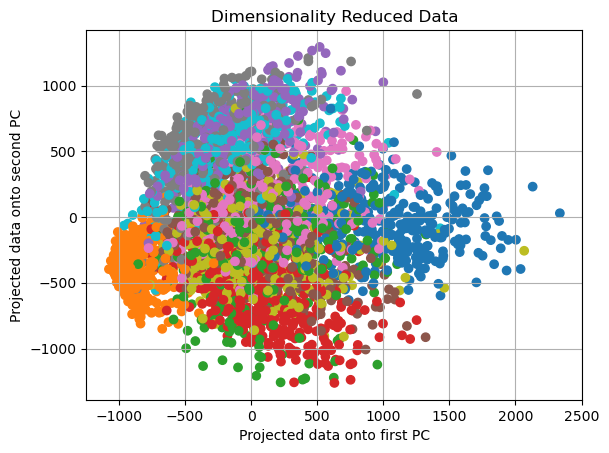

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

data = X2D.to_numpy()

x_axis = data[:, 0]
y_axis = data[:, 1]

# Assuming your label data is in a series named 'class' in the 'y_subset' series
label_column = 'class'  # Update with the actual column name

if label_column in y_subset.name:
    # Convert the label series to numeric values
    labels = pd.to_numeric(y_subset, errors='coerce')

    plt.scatter(x_axis, y_axis, c=labels, cmap="tab10")
    plt.xlabel('Projected data onto first PC')
    plt.ylabel('Projected data onto second PC')
    plt.title('Dimensionality Reduced Data')
    plt.grid(True)

    plt.show()
else:
    print(f"Column '{label_column}' does not exist in the 'y_subset' Series.")


Let's perform PCA with 3 PCs

In [7]:
X = mnist.data 
y = mnist.target 

_, X_subset, _, y_subset = train_test_split(X, y, random_state=42, test_size=0.05)

X_centered = X_subset - X_subset.mean(axis=0) #center data around 0
U, s, Vt = np.linalg.svd(X_centered) #perform SVD on centered data

W2 = Vt.T[:, :3] #get first three principal components  ---> (784, 3)
X2D = X_centered.dot(W2) #project data onto first two principal components (3500, 784) x (784, 3)  = (3500, 3)
print(X2D.shape)

(3500, 3)


Plot

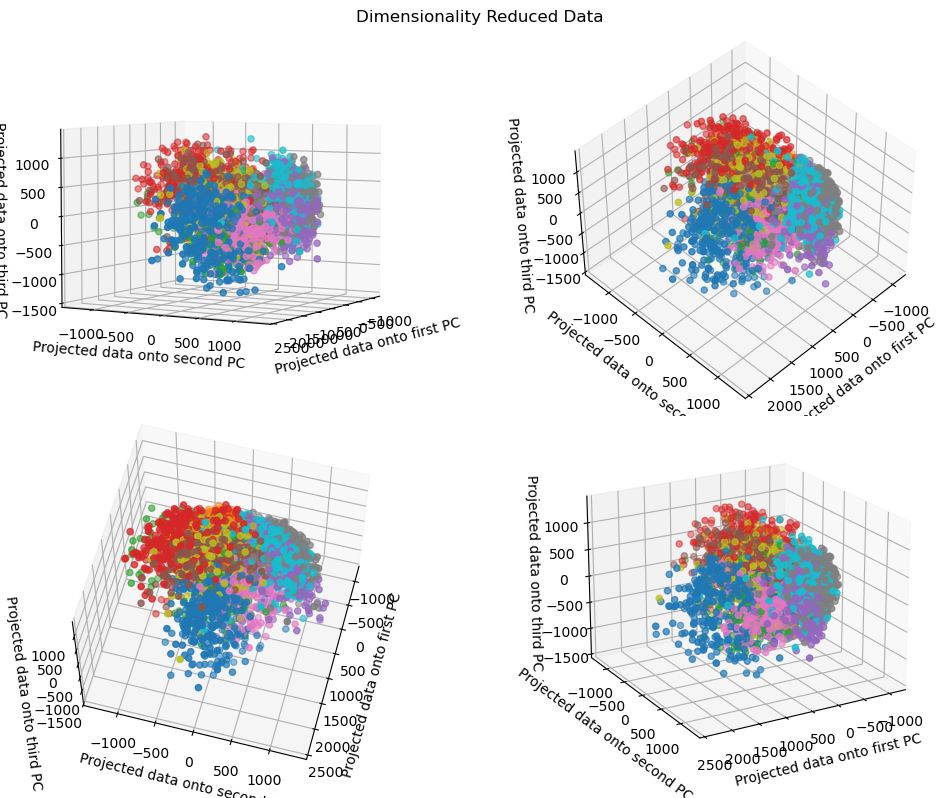

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

data = X2D.to_numpy()

x_axis = data[:, 0]
y_axis = data[:, 1]
z_axis = data[:, 2]


fig = plt.figure(figsize=(12, 8))  # Create a new figure with a larger size

# Viewpoint angles for each subplot
viewpoints = [(5, 30), (45, 45), (60, 15), (20, 60)]

# Iterate over the four subplots
for i, viewpoint in enumerate(viewpoints):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')  # Add a subplot
    ax.scatter(x_axis, y_axis, z_axis, c=labels, cmap="tab10")  # Scatter plot of data

    # Set labels
    ax.set_xlabel("Projected data onto first PC")
    ax.set_ylabel('Projected data onto second PC')
    ax.set_zlabel('Projected data onto third PC')

    ax.view_init(viewpoint[0], viewpoint[1])  # Set the viewpoint

fig.suptitle('Dimensionality Reduced Data')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


Let's increase the PCs for model training. 2 and 3 PCs didn't seem to be enough to capture enough variance in the data. Their plots were very meshed together and preliminary model training performed significantly worse on the reduced data than the unreduced data. Logically this makes sense, as the fewer dimmensions you squish the data into, the less information is contained in each feature. We'll do 35 PCs. This means we are reducing mnists 784 dimmensions to 35. Still a substantial reduction.

In [34]:
X = mnist.data 
y = mnist.target 

_, X_subset, _, y_subset = train_test_split(X, y, random_state=42, test_size=0.40)

X_centered = X_subset - X_subset.mean(axis=0) #center data around 0
U, s, Vt = np.linalg.svd(X_centered) #perform SVD on centered data

W2 = Vt.T[:, :35] #get first three principal components  ---> (784, 35)
X2D = X_centered.dot(W2) #project data onto first two principal components (28000, 784) x (784, 35)  = (28000, 35) <---- reduced data
print(X2D.shape)

(28000, 35)


Train Random Forest Classifer on 35 PCs. Training Size has been increased for model training compared to visualization exercises.  5% -> 40%. 

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X2D, y_subset, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9498214285714286


Let's compare the performance to the random forest clf trained on the unreduced data. We will be matching the training sizes (40% of original 70000 images)

In [36]:
_, X_forty, _, y_forty = train_test_split(X, y, test_size=0.40, random_state=42)   #reduce original data to 40% of its original size
print(X_forty.shape)

scaler = StandardScaler()
X_forty = scaler.fit_transform(X_forty) #scale data to have mean 0 and variance 1 - this was does to PCA data prior to reduction as well 

X_train, X_test, y_train, y_test = train_test_split(X_forty, y_forty, test_size=0.2, random_state=42)


clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

(28000, 784)
Accuracy: 0.9601785714285714


Despite reducing the number of features by 95%, the accuracy of the model is only reduced by 1.5%. This is a good result. It shows that PCA can be used to reduce the number of features in a dataset without significantly reducing the accuracy of the model. This is useful for reducing the computational cost of training a model, as well as reducing the amount of data required to train a model.